In [80]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [81]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("^GSPC", 'yahoo', start, end)
df.tail()

High          Low         Open        Close      Volume  \
Date                                                                         
2021-11-29  4672.950195  4625.259766  4628.750000  4655.270020  3471380000   
2021-11-30  4646.020020  4560.000000  4640.250000  4567.000000  4950190000   
2021-12-01  4652.939941  4510.270020  4602.819824  4513.040039  4078260000   
2021-12-02  4595.459961  4504.729980  4504.729980  4577.100098  3771510000   
2021-12-03  4608.029785  4495.120117  4589.490234  4538.430176  3971500000   

              Adj Close  
Date                     
2021-11-29  4655.270020  
2021-11-30  4567.000000  
2021-12-01  4513.040039  
2021-12-02  4577.100098  
2021-12-03  4538.430176

In [82]:
df.shape

(5517, 6)

In [134]:
df.reset_index(inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5511 non-null   datetime64[ns]
 1   High                  5511 non-null   float64       
 2   Low                   5511 non-null   float64       
 3   Open                  5511 non-null   float64       
 4   Close                 5511 non-null   float64       
 5   Volume                5511 non-null   int64         
 6   Adj Close             5511 non-null   float64       
 7   Highrolling_mean_3    5511 non-null   float64       
 8   Highrolling_mean_7    5511 non-null   float64       
 9   Lowrolling_mean_3     5511 non-null   float64       
 10  Lowrolling_mean_7     5511 non-null   float64       
 11  Volumerolling_mean_3  5511 non-null   float64       
 12  Volumerolling_mean_7  5511 non-null   float64       
 13  Highrolling_std_3 

In [136]:
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df1=missing_value_df[missing_value_df['percent_missing']!=0]
df1=df1.sort_values('percent_missing',ascending=False)
df1

Empty DataFrame
Columns: [percent_missing]
Index: []

In [137]:
y=df['Adj Close']

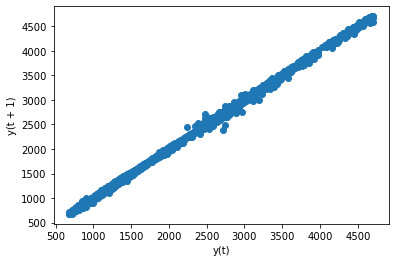

In [138]:
from pandas.plotting import lag_plot
lag_plot(y);

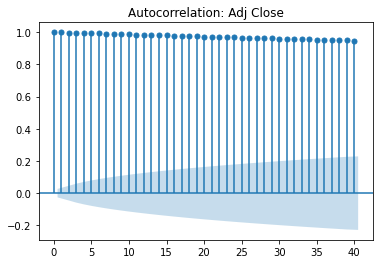

In [139]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y,title=title,lags=lags);

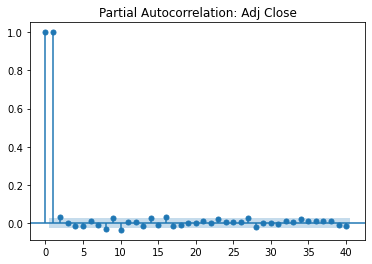

In [140]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y,title=title,lags=lags);

<AxesSubplot:>

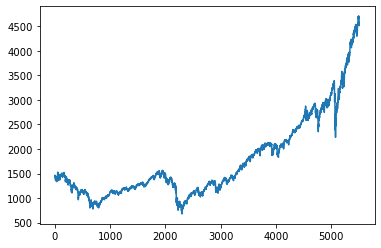

In [141]:
y.plot()

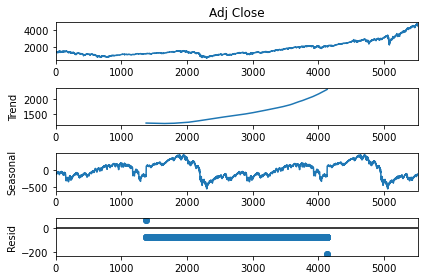

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model = 'additive', period = int(len(df)/2))
result.plot();

In [143]:
from statsmodels.tsa.stattools import kpss

# Use kpss()
kpss(y)

(11.952171185220823,
 0.01,
 33,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [144]:
y_log=np.log(y)

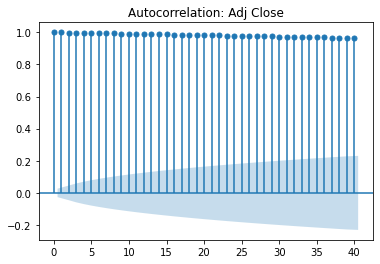

In [145]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y_log,title=title,lags=lags);

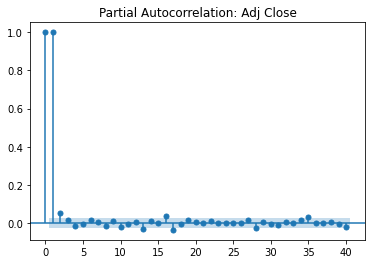

In [146]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y_log,title=title,lags=lags);

<AxesSubplot:>

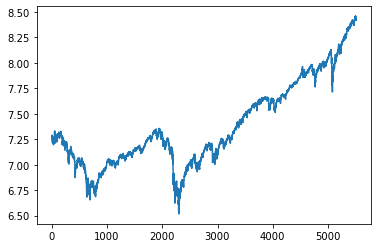

In [147]:
y_log.plot()

In [148]:
y_diff=y_log.diff()
y_diff=y_diff[2:]

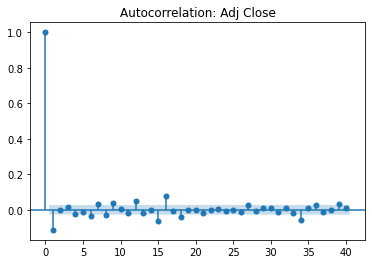

In [149]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y_diff,title=title,lags=lags);

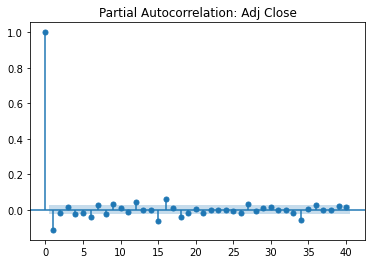

In [150]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y_diff,title=title,lags=lags);

<AxesSubplot:>

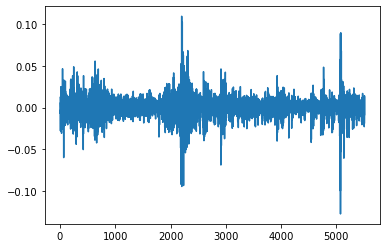

In [151]:
y_diff.plot()

In [152]:
kpss(y_diff)

(0.43704501211495966,
 0.06118749477803463,
 33,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [153]:
lag_features=['High','Low','Volume']
window1=3
window2=7

In [154]:
for feature in lag_features:
    df[feature+'rolling_mean_3']=df[feature].rolling(window=window1).mean()
    df[feature+'rolling_mean_7']=df[feature].rolling(window=window2).mean()

In [155]:
for feature in lag_features:
    df[feature+'rolling_std_3']=df[feature].rolling(window=window1).std()
    df[feature+'rolling_std_7']=df[feature].rolling(window=window2).std()

In [234]:
df['Week_of_year'] = df['Date'].dt.week
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_year'] = df['Date'].dt.dayofyear
df['days_diff_from_today'] = (datetime.datetime.now() - df['Date']).dt.days
df['month_diff_from_today'] = (datetime.datetime.now() - df['Date']).dt.days//30
df['quarter'] = df['Date'].dt.quarter
df['is_quarter_start'] = df['Date'].dt.is_quarter_start
df['is_quarter_end'] = df['Date'].dt.is_quarter_end
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [235]:
from calendar import monthrange
def last_day_of_month(date_value):
    return date_value.replace(day = monthrange(date_value.year, date_value.month)[1])
df['days_to_end_of_the_month'] = df['Date'].apply(lambda x: (last_day_of_month(x) - x).days)

In [236]:
df['is_month_start'] = df['Date'].dt.is_month_start
df['is_month_start'] = df['is_month_start'].map({True: 1, False:0})
df['is_month_end'] = df['Date'].dt.is_month_end
df['is_month_end'] = df['is_month_end'].map({True: 1, False:0})
df['is_leap_year'] = df['Date'].dt.is_leap_year
df['is_leap_year'] = df['is_leap_year'].map({True: 1, False:0})

In [237]:
df.dropna(inplace=True)

In [238]:
df.describe()

High          Low         Open        Close        Volume  \
count  5505.000000  5505.000000  5505.000000  5505.000000  5.505000e+03   
mean   1773.379161  1752.458715  1763.316918  1763.562228  3.213840e+09   
std     845.503642   839.603453   842.605567   842.846968  1.510078e+09   
min     695.270020   666.789978   679.280029   676.530029  3.560700e+08   
25%    1181.199951  1165.089966  1172.699951  1172.920044  1.859150e+09   
50%    1413.949951  1397.849976  1406.640015  1406.819946  3.301650e+09   
75%    2123.889893  2109.610107  2115.649902  2117.689941  4.034680e+09   
max    4743.830078  4694.390137  4712.000000  4704.540039  1.145623e+10   

         Adj Close  Highrolling_mean_3  Highrolling_mean_7  Lowrolling_mean_3  \
count  5505.000000         5505.000000         5505.000000        5505.000000   
mean   1763.562228         1772.808553         1771.653632        1751.904896   
std     842.846968          844.579882          842.702212         838.695134   
min     676.530029          700.876689          712.512861         672.533325   
25%    1172.920044         1181.489990         1182.477173        1165.106649   
50%    1406.819946         1414.626628         1414.941424        1397.543335   
75%    2117.689941         2122.443278         2120.439976        2107.626628   
max    4704.540039         4723.459961         4712.727190        4683.803385   

       Lowrolling_mean_7  ...  days_diff_from_today  month_diff_from_today  \
count        5505.000000  ...           5505.000000            5505.000000   
mean         1750.779234  ...           3993.422343             132.631971   
std           836.851107  ...           2306.592954              76.886807   
min           683.925711  ...              2.000000               0.000000   
25%          1164.715698  ...           1997.000000              66.000000   
50%          1397.822841  ...           3994.000000             133.000000   
75%          2103.280029  ...           5989.000000             199.000000   
max          4676.931431  ...           7990.000000             266.000000   

       days_to_end_of_the_month      quarter         year        month  \
count               5505.000000  5505.000000  5505.000000  5505.000000   
mean                  14.716621     2.512262  2010.493188     6.536603   
std                    8.756911     1.112285     6.312593     3.411433   
min                    0.000000     1.000000  2000.000000     1.000000   
25%                    7.000000     2.000000  2005.000000     4.000000   
50%                   15.000000     3.000000  2010.000000     7.000000   
75%                   22.000000     4.000000  2016.000000    10.000000   
max                   30.000000     4.000000  2021.000000    12.000000   

               day  is_month_start  is_month_end  is_leap_year  
count  5505.000000     5505.000000   5505.000000   5505.000000  
mean     15.744414        0.030699      0.033606      0.272480  
std       8.758503        0.172518      0.180229      0.445276  
min       1.000000        0.000000      0.000000      0.000000  
25%       8.000000        0.000000      0.000000      0.000000  
50%      16.000000        0.000000      0.000000      0.000000  
75%      23.000000        0.000000      0.000000      1.000000  
max      31.000000        1.000000      1.000000      1.000000  

[8 rows x 31 columns]

In [239]:
df1=df.drop(columns=['Adj Close'])

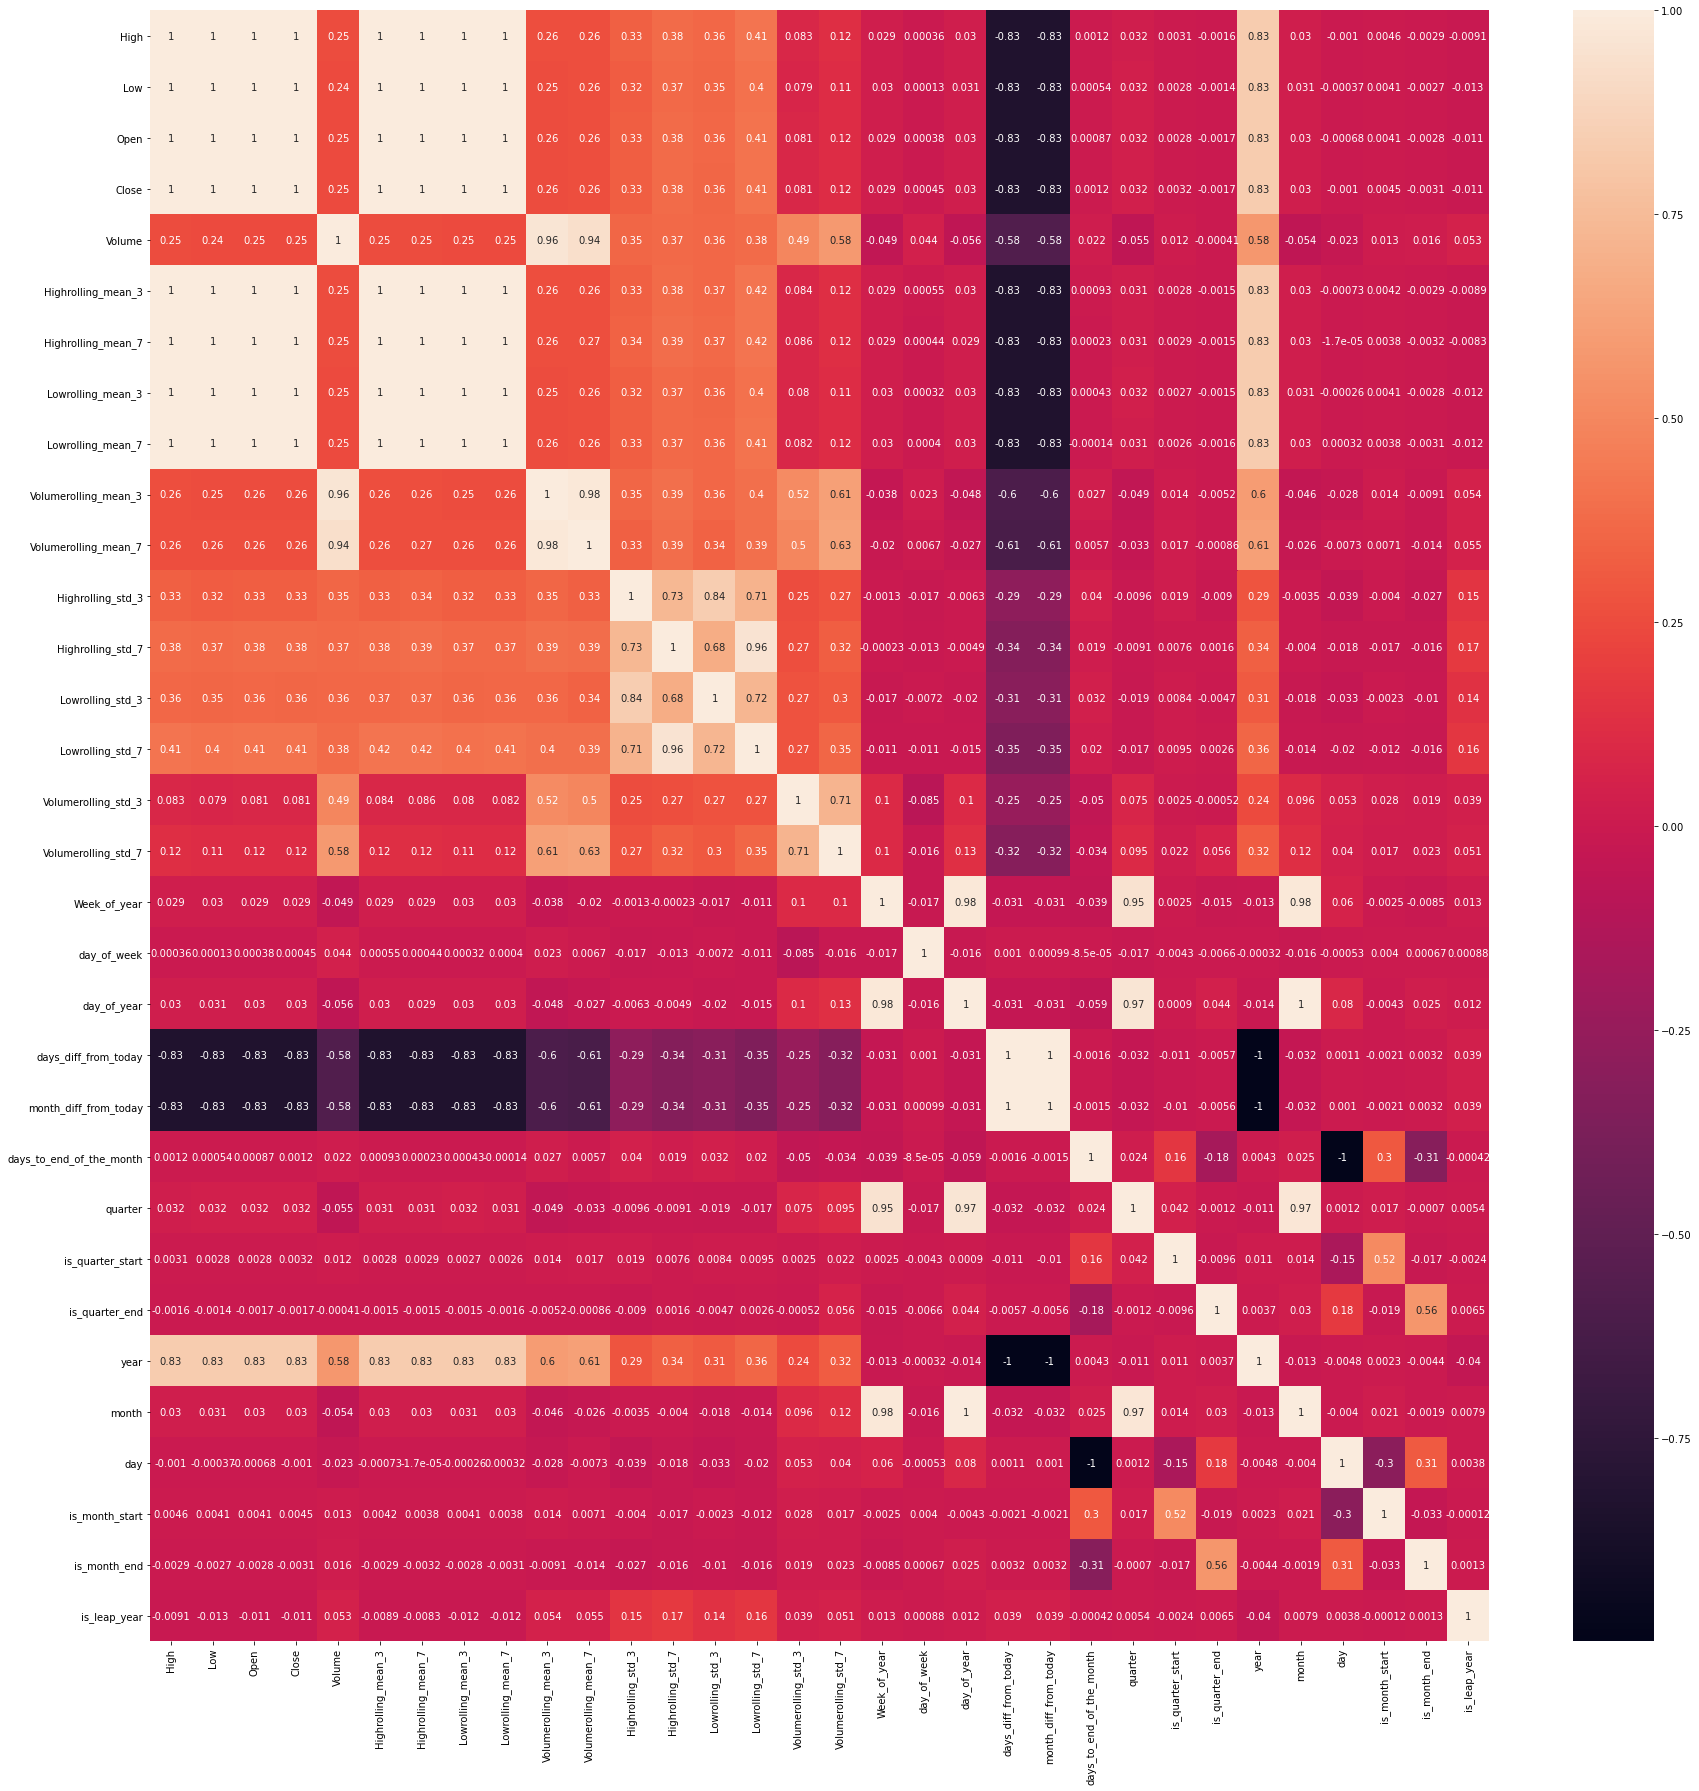

In [240]:
import seaborn as sns
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(df1.corr(),annot = True)
plt.show()

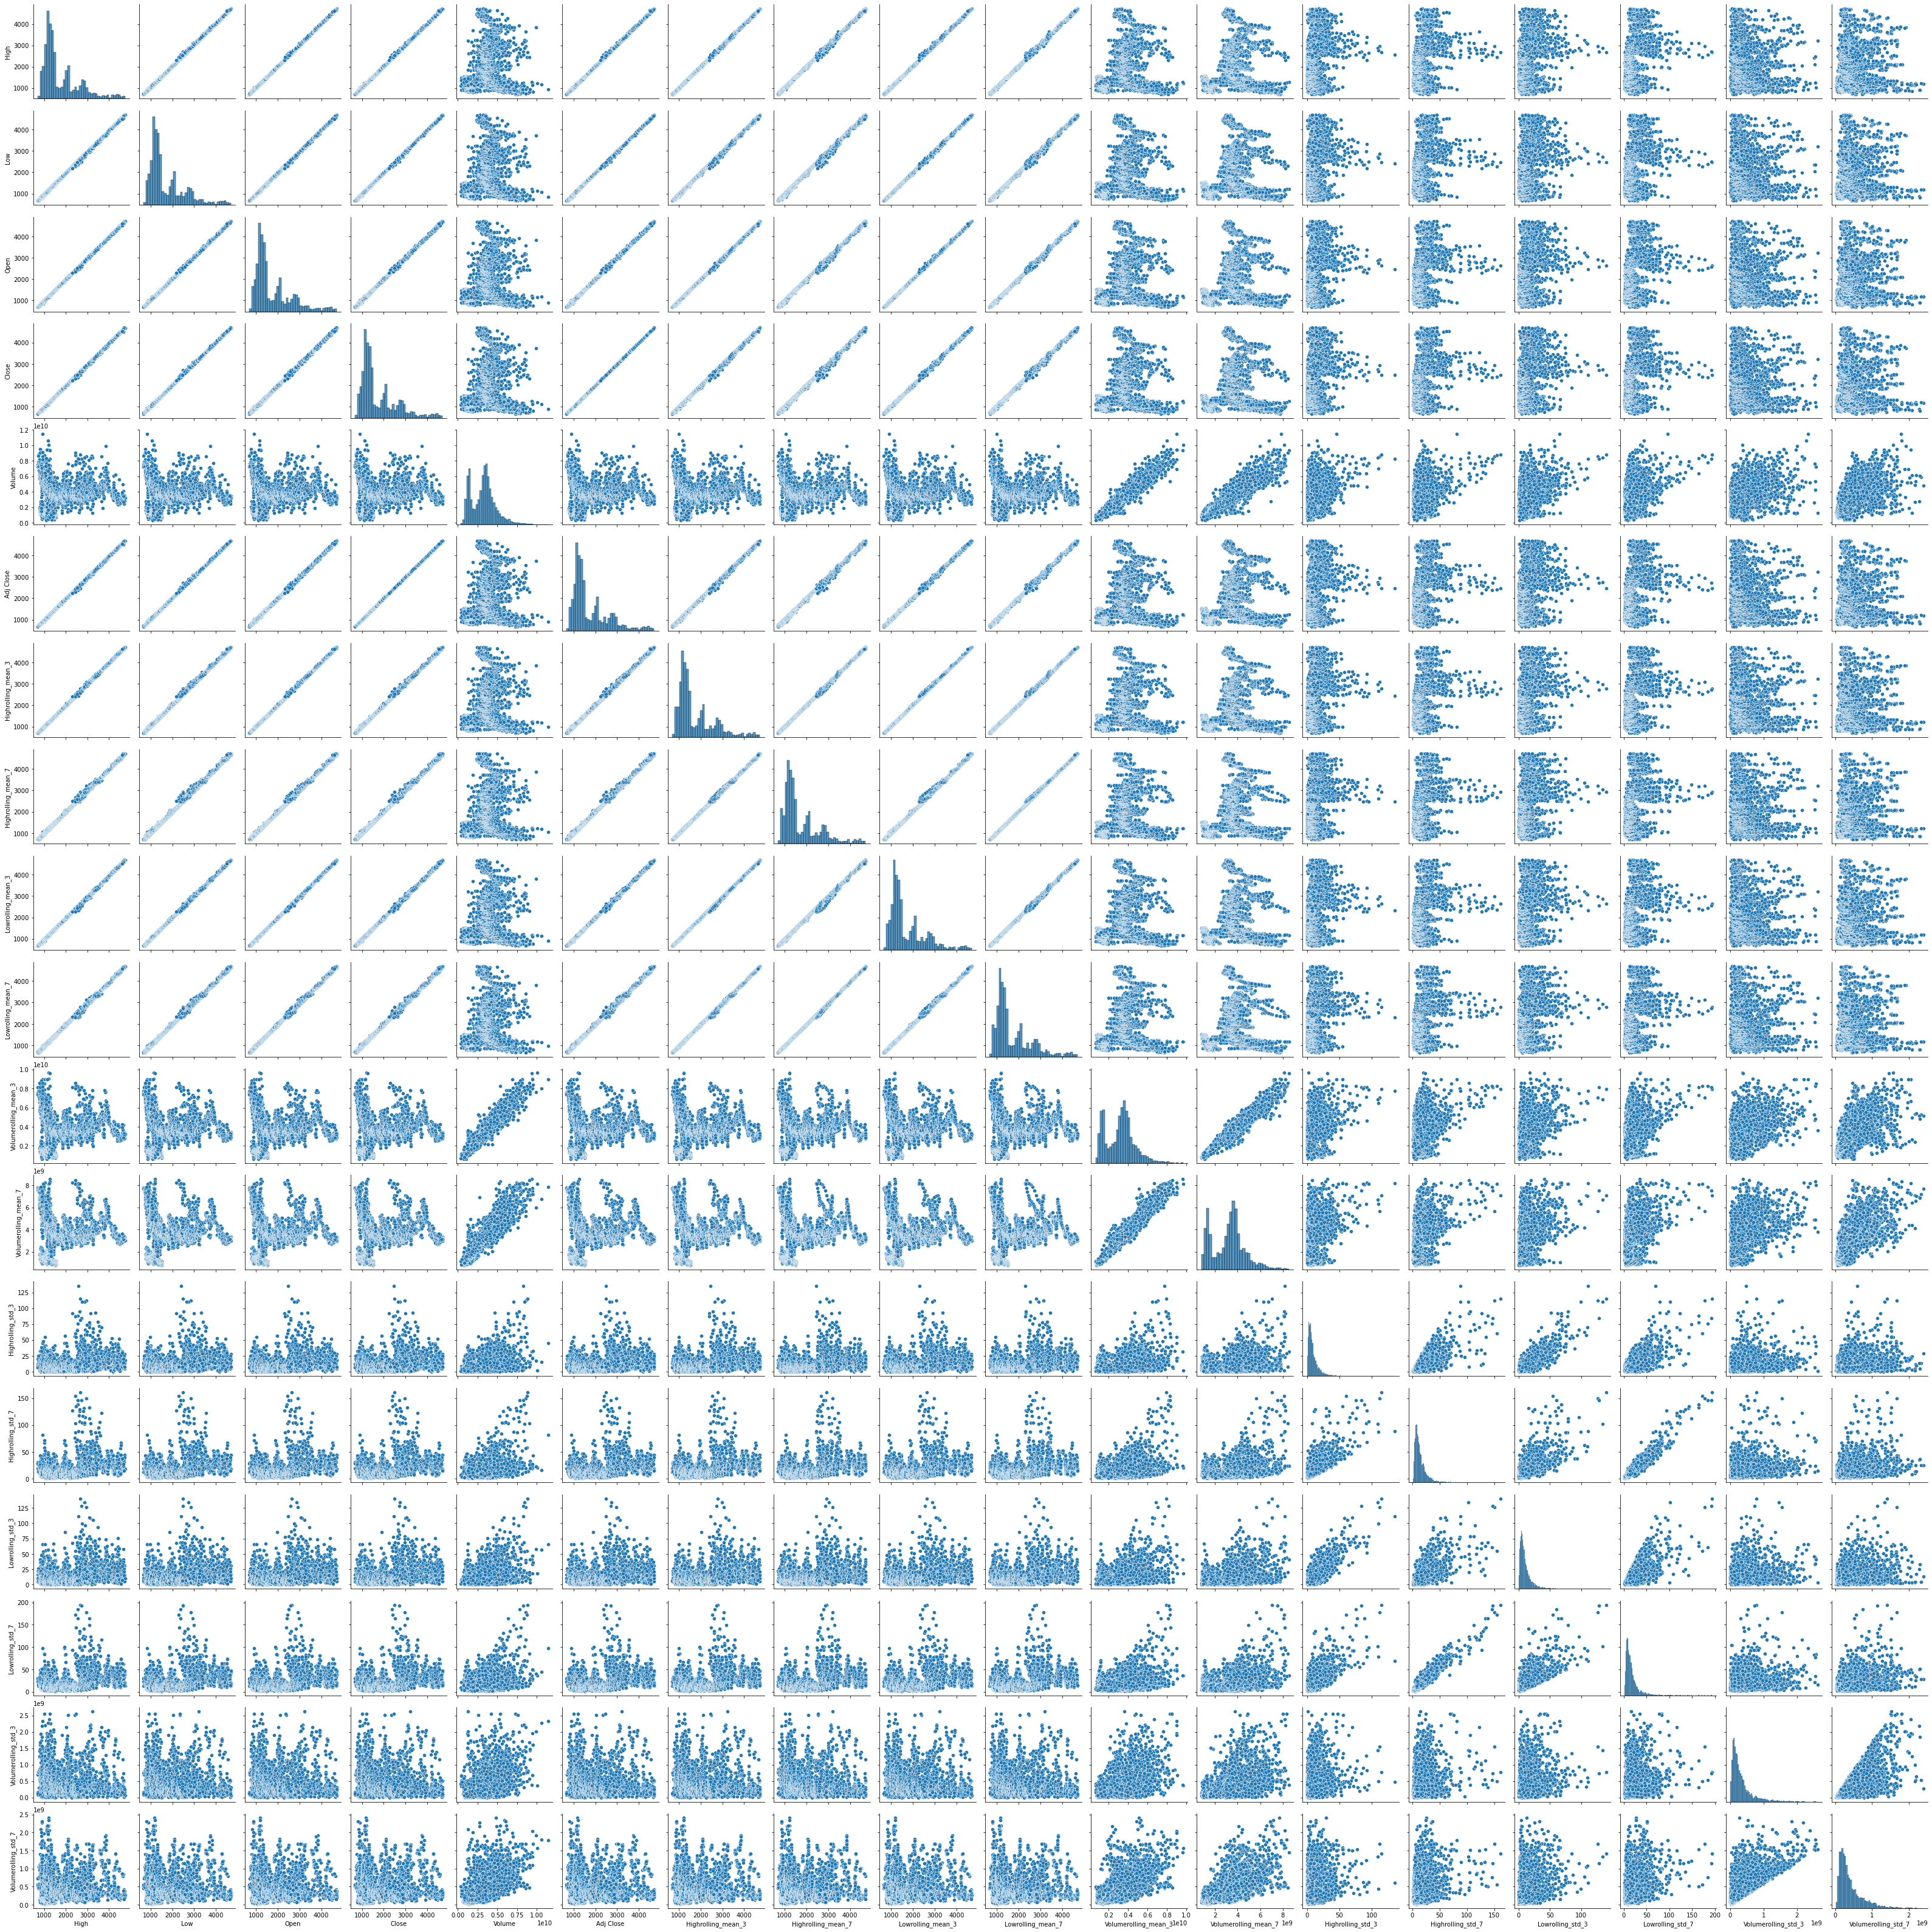

In [160]:
_plt = sns.pairplot(df)

In [258]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7',
       'Week_of_year', 'day_of_week', 'day_of_year', 'days_diff_from_today',
       'month_diff_from_today', 'days_to_end_of_the_month', 'quarter',
       'is_quarter_start', 'is_quarter_end', 'year', 'month', 'day',
       'is_month_start', 'is_month_end', 'is_leap_year'],
      dtype='object')

In [275]:
ind_features=['High', 'Low', 'Open','Volume','day','quarter']

In [268]:
training_data=df[0:1800]
test_data=df[1800:]

In [269]:
import pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [270]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
print('Augmented Dickey-Fuller Test on SP_500 Index')
dftest = adfuller(df['Adj Close'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on SP_500 Index


(2.8128576274538952,
 1.0,
 27,
 5477,
 {'1%': -3.4315445166084517,
  '5%': -2.8620678572915317,
  '10%': -2.5670509773365},
 48764.27981956875)

In [271]:
print('Augmented Dickey-Fuller Test on SP_500 Index')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on SP_500 Index
ADF test statistic         2.812858
p-value                    1.000000
# lags used               27.000000
# observations          5477.000000
critical value (1%)       -3.431545
critical value (5%)       -2.862068
critical value (10%)      -2.567051
dtype: float64


In [272]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
print('Augmented Dickey-Fuller Test on SP_500 Index')
dftest1 = adfuller(y_diff,autolag='AIC')
dftest1

Augmented Dickey-Fuller Test on SP_500 Index


(-13.745519103463087,
 1.0744093616613111e-25,
 33,
 5475,
 {'1%': -3.4315449531663913,
  '5%': -2.8620680501678697,
  '10%': -2.567051080010842},
 -32681.76989334164)

In [273]:
print('Augmented Dickey-Fuller Test on SP_500 Index')

dfout1 = pd.Series(dftest1[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout1)

Augmented Dickey-Fuller Test on SP_500 Index
ADF test statistic   -1.374552e+01
p-value               1.074409e-25
# lags used           3.300000e+01
# observations        5.475000e+03
dtype: float64


In [274]:
model=auto_arima(y=training_data['Adj Close'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10991.078, Time=1.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11002.182, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10990.652, Time=1.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10989.710, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22693.158, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10988.415, Time=1.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10988.699, Time=1.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10990.011, Time=1.68 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=10989.752, Time=1.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10990.334, Time=1.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10986.347, Time=1.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10987.691, Time=1.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10988.652, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10986.422, Time=1.28 sec
 ARIMA(1,0,2)(0,0,0

In [276]:
model.fit(training_data['Adj Close'],training_data[ind_features])

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [277]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [278]:
test_data['Forecast_ARIMA']=forecast

<AxesSubplot:>

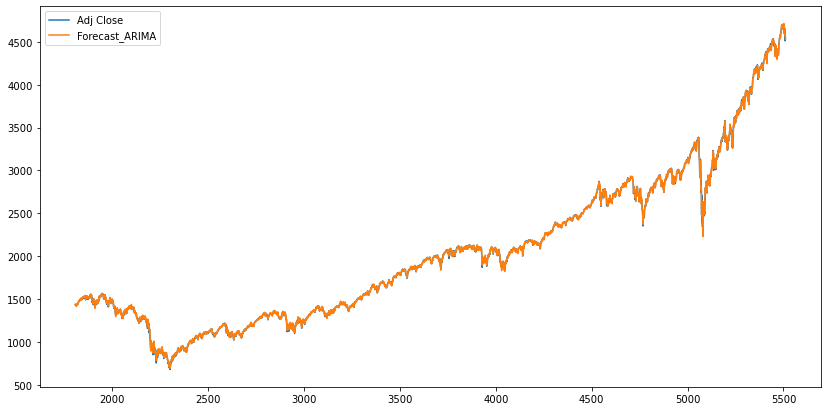

In [279]:
test_data[['Adj Close','Forecast_ARIMA']].plot(figsize=(14,7))

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [281]:
np.sqrt(mean_squared_error(test_data['Adj Close'],test_data['Forecast_ARIMA']))

8.57853405799439

In [282]:
mean_absolute_error(test_data['Adj Close'],test_data['Forecast_ARIMA'])

5.552740323527056

In [283]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape

In [284]:
MAPE(test_data['Adj Close'],test_data['Forecast_ARIMA'])

0.003007205286293514